# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = dataset.iloc[:,[3,4]].values

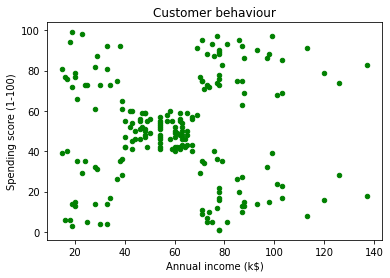

In [13]:
plt.scatter(X[:,0], X[:,1], s = 20, color = 'green')
plt.title('Customer behaviour')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.show()

## Using the elbow method to find the optimal number of clusters

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [20]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25095.703209997544,
 21830.04197804944,
 20736.67993892413]

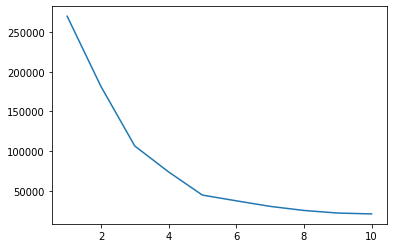

In [21]:
plt.plot(range(1,11), wcss)
plt.show()

## Training the K-Means model on the dataset

In [22]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

In [23]:
y_kmeans = kmeans.fit_predict(X)

In [24]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Visualising the clusters

In [25]:
a = ['goddag', 'adjö']

In [43]:
X[y_kmeans == 4]
#Hittar vilka punkter som ärlikamed 4

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

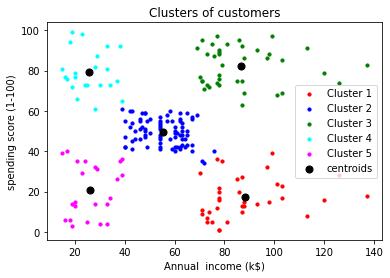

In [53]:
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans==0, 1], s= 10, c = 'red', label = 'Cluster 1' )
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans==1, 1], s= 10, c = 'blue', label = 'Cluster 2' )
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans==2, 1], s= 10, c = 'green', label = 'Cluster 3' )
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans==3, 1], s= 10, c = 'cyan', label = 'Cluster 4' )
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans==4, 1], s= 10, c = 'magenta', label = 'Cluster 5' )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=50,c='black', label = 'centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual  income (k$)')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()

In [52]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

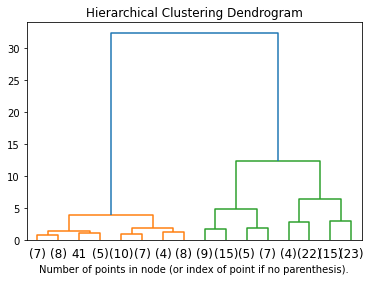

In [54]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()